In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import train_test_split
plt.style.use('fivethirtyeight')
%matplotlib inline


# Exercise 4.1

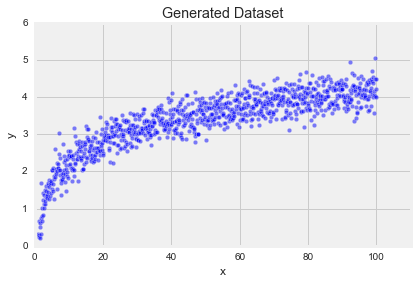

In [30]:
N = 1000
x = np.linspace(1,100,N)
eps = np.random.normal(0, 0.3, N)
beta0 = np.random.uniform(0, 1, 1)
beta1 = np.random.uniform(0.8, 1, 1)
y = beta1*np.log(x) + eps + beta0
x = x.reshape(-1, 1); y = y.reshape(-1, 1)
plt.scatter(x,y,alpha=0.5)
plt.xlabel('x');   plt.ylabel('y')
plt.xlim([0,110]); plt.ylim([0,6])
plt.title('Generated Dataset');

##### Fit x squared and log(x) models

In [34]:

x_train1, x_test1, y_train1, y_test1 = train_test_split(np.square(x), y, test_size=.75)
mod1 = LinearRegression()
fit1 = mod1.fit(x_train1,y_train1)
y_pred1 = fit1.predict(x_test1) 
score1 = metrics.r2_score(y_test1,y_pred1)
print('R squared score x^2:',score1)

R squared score x^2: 0.557182423206


In [35]:
x_train1_1, x_test1_1, y_train1_1, y_test1_1 = train_test_split(np.log(x), y, test_size=.75)
mod1_1 = LinearRegression()
fit1_1 = mod1_1.fit(x_train1_1,y_train1_1)
y_pred1_1 = fit1_1.predict(x_test1_1) 
score1_1 = metrics.r2_score(y_test1_1,y_pred1_1)
print('R squared score log(x):',score1_1)

R squared score log(x): 0.870764408203


# Exercise 4.2

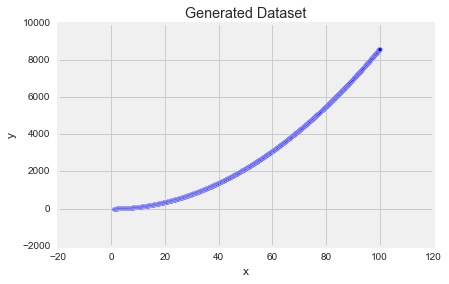

In [94]:
N = 1000
x = np.linspace(1,100,N)
eps = np.random.normal(0, 0.3, N)
beta0 = np.random.uniform(0, 1, 1)
beta1 = np.random.uniform(0.13, .26, 1)
beta2 = np.random.uniform(.1,1,1)
y =   beta0 + beta1*(x) + beta2*(x**2) + eps
x = x.reshape(-1, 1); y = y.reshape(-1, 1)
plt.scatter(x,y,alpha=0.5)
plt.xlabel('x');   plt.ylabel('y')
plt.title('Generated Dataset');

In [95]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(np.square(x), y, test_size=.75)
mod2 = LinearRegression()
fit2 = mod2.fit(x_train2,y_train2)
y_pred2 = fit2.predict(x_test2) 
score2 = metrics.mean_squared_error(y_test2,y_pred2)
score2r = metrics.r2_score(y_test2, y_pred2)
print('Mean Squared error: ', score2 , '\n' , 'R^2 score:', score2r)

Mean Squared error:  3.3502909873 
 R^2 score: 0.999999473239


##### Performance!

# Exercise 4.3

In [96]:
trainingError = []
testingError = []
rsquared = []
for degree in range(0,8):
    polDeg = PolynomialFeatures(degree)
    X = polDeg.fit_transform(x)
    x_train3, x_test3, y_train3, y_test3 = train_test_split(X, y, test_size=.3)
    mod3 = sm.OLS(y_train3,x_train3)
    fit3 = mod3.fit()
    
    trainingError.append(metrics.mean_squared_error(y_train3,fit3.predict(x_train3)))
    testingError.append(metrics.mean_squared_error(y_test3,fit3.predict(x_test3)))
    rsquared.append(metrics.r2_score(y_test3,fit3.predict(x_test3)))

    
    

    

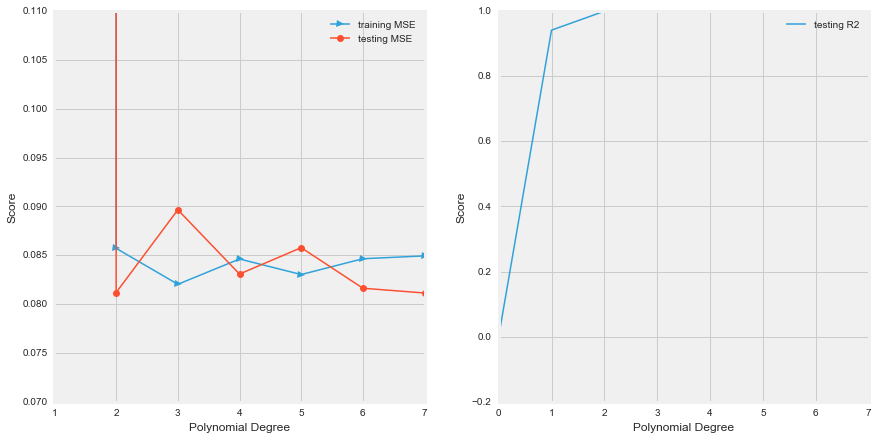

In [97]:
plt.figure(figsize=(13,7))

plt.subplot(1,2,1)
plt.plot(range(1,8), trainingError[1:8], '->',linewidth = 1.5)
plt.plot(range(1,8), testingError[1:8], '-o',linewidth = 1.5)
plt.ylim((0.07,0.11))
plt.xlabel('Polynomial Degree')
plt.ylabel('Score')
plt.legend(['training MSE', 'testing MSE'])
plt.subplot(1,2,2)
plt.plot(range(0,8),rsquared[0:8],'-+',linewidth = 1.5)
plt.legend(['testing R2'])
plt.xlabel('Polynomial Degree')
plt.ylabel('Score')


# Exercise 4.4

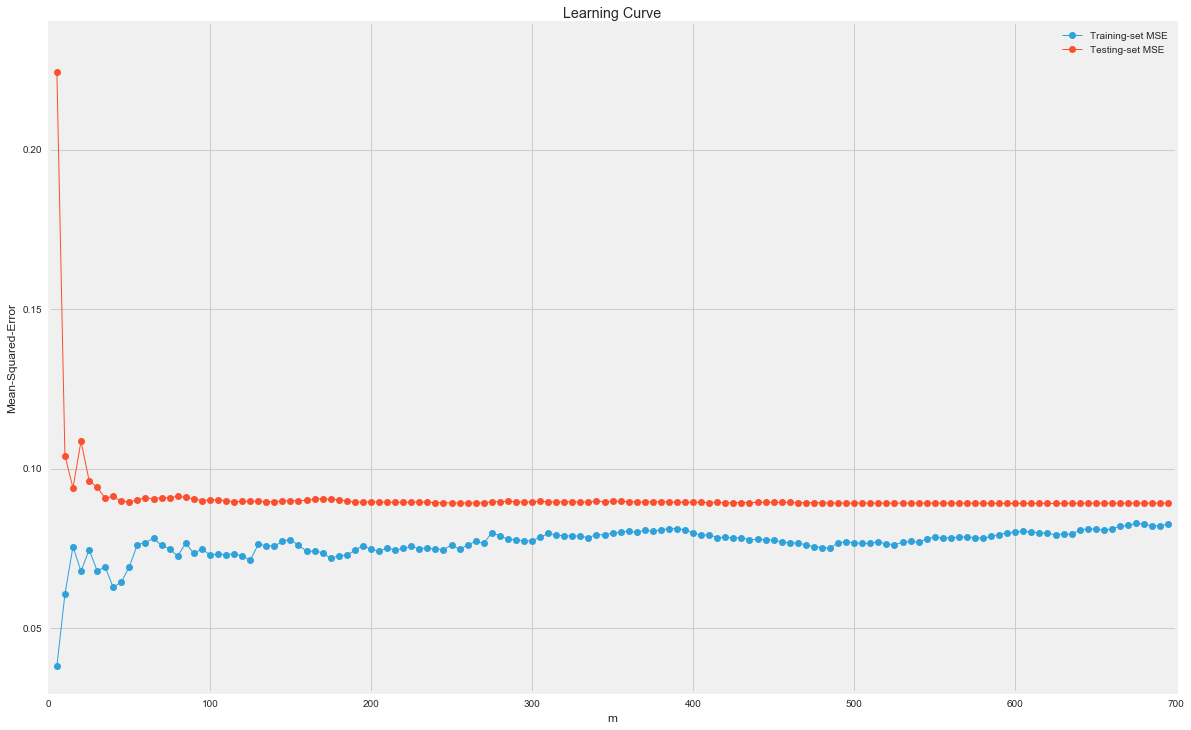

In [126]:
training_error = []
testing_error = []
m_list = []
x_train4, x_test4, y_train4, y_test4 = train_test_split(x, y, test_size=0.3, random_state=8)
for m in range(5,len(y_train4),5):
    poly = PolynomialFeatures(2)
    ym_train = y_train4[0:m]
    xm_train = x_train4[0:m]
    Xm_train = poly.fit_transform(xm_train)
    X_test = poly.fit_transform(x_test4)
    model = sm.OLS(ym_train, Xm_train)
    fit = model.fit()
    training_error.append(metrics.mean_squared_error(ym_train, fit.predict(Xm_train)))
    testing_error.append(metrics.mean_squared_error(y_test4, fit.predict(X_test)))
    m_list.append(m)
plt.figure(figsize=(18,12))
plt.plot(m_list,training_error,'-o',linewidth = 1)
plt.plot(m_list,testing_error,'-o',linewidth = 1)
plt.ylim((.03,.24))
plt.xlabel('m')
plt.legend(['Training-set MSE','Testing-set MSE'])
plt.title('Learning Curve')
plt.ylabel('Mean-Squared-Error');

# Challenge 4 done. Kyle out!